In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Data/archive.zip" -d "/content/gtsrb-german-traffic-sign/"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00010.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00011.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00012.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00013.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00014.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00015.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00016.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00017.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00018.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00019.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_00053_00020.png  
  inflating: /content/gtsrb-german-traffic-sign/train/5/00005_0

In [ ]:
import cv2

from collections import Counter

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

import numpy as np

import os

import pandas as pd

from PIL import Image

import tensorflow as tf
from tensorflow import keras

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from skimage import feature
from sklearn import svm

In [ ]:
dataset_directory = os.path.join(os.getcwd(), 'gtsrb-german-traffic-sign')

# EDA


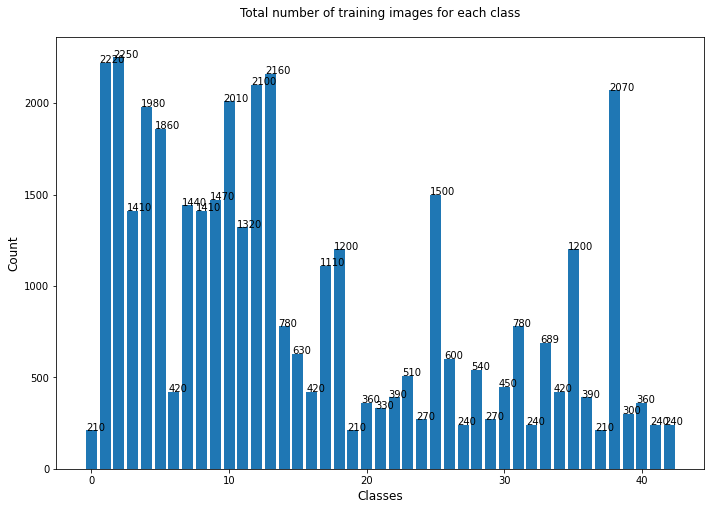

In [ ]:
df_train = pd.read_csv(os.path.join(dataset_directory, "Train.csv"))
df_train.head()
unique_class, counts_class = np.unique(df_train["ClassId"], return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(unique_class,counts_class)
ax.set_xlabel('Classes', fontsize='large')
ax.set_ylabel('Count', fontsize='large')
ax.set_title('Total number of training images for each class', fontsize='large', pad=20)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.03,str(round((i.get_height()), 1)), fontsize=10,color='black')
plt.show()

# Data Processing

In [ ]:
def HOG(input):
    list=[]
    for i in range(input.shape[0]):
        img=input[i]
        H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        list.append(H)

    return np.array(list)

In [ ]:
def get_data_X_y(dataset_directory, csv_file):
    df = pd.read_csv(os.path.join(dataset_directory, csv_file))
    X = []
    y = []
    for row in df.iterrows():
        path = os.path.join(dataset_directory, row[1][7])
        image = cv2.imread(path)
        cropped_image = image[int(row[1][3]): int(row[1][5]), int(row[1][2]): int(row[1][4])]
        rgb_image = Image.fromarray(cropped_image, 'RGB')
        resized_image = rgb_image.resize((40, 40))
        X.append(np.array(resized_image))
        y.append(row[1][6])
    return np.array(X), np.array(y)

In [ ]:
train_data, train_label = get_data_X_y(dataset_directory, "Train.csv")

print("train_data.shape", train_data.shape)
print("train_label.shape", train_label.shape)

train_data = HOG(train_data)

train_data.shape (39209, 40, 40, 3)
train_label.shape (39209,)


In [ ]:
test_data, test_label = get_data_X_y(dataset_directory, "Test.csv")

print("test_data.shape", test_data.shape)
print("test_label.shape", test_label.shape)

test_data.shape (12630, 40, 40, 3)
test_label.shape (12630,)


In [ ]:
test_data_orginal, _ = get_data_X_y(dataset_directory, "Test.csv")



In [ ]:
test_data=HOG(test_data)

In [ ]:
shuffle_indexes = np.arange(train_data.shape[0])
np.random.shuffle(shuffle_indexes)
train_data = train_data[shuffle_indexes]
train_label = train_label[shuffle_indexes]
X_train, X_valid, y_train, y_valid = train_test_split(train_data, 
                                                  train_label, 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  shuffle=True)
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (27446, 576)
X_valid.shape (11763, 576)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
X_train_resampled, y_train_resampled =SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_train_resampled).items()))
print("X_train_resampled.shape", X_train_resampled.shape)
print("y_train_resamepled.shape", y_train_resampled.shape)

[(0, 1580), (1, 1580), (2, 1580), (3, 1580), (4, 1580), (5, 1580), (6, 1580), (7, 1580), (8, 1580), (9, 1580), (10, 1580), (11, 1580), (12, 1580), (13, 1580), (14, 1580), (15, 1580), (16, 1580), (17, 1580), (18, 1580), (19, 1580), (20, 1580), (21, 1580), (22, 1580), (23, 1580), (24, 1580), (25, 1580), (26, 1580), (27, 1580), (28, 1580), (29, 1580), (30, 1580), (31, 1580), (32, 1580), (33, 1580), (34, 1580), (35, 1580), (36, 1580), (37, 1580), (38, 1580), (39, 1580), (40, 1580), (41, 1580), (42, 1580)]
X_train_resampled.shape (67940, 576)
y_train_resamepled.shape (67940,)


# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=80, criterion='entropy', max_features='log2')

In [ ]:
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=80)

In [ ]:
print(classification_report(test_label, rf_model.predict(test_data)))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        60
           1       0.91      0.76      0.83       720
           2       0.83      0.90      0.86       750
           3       0.86      0.81      0.84       450
           4       0.89      0.91      0.90       660
           5       0.68      0.77      0.72       630
           6       0.80      0.82      0.81       150
           7       0.86      0.80      0.82       450
           8       0.73      0.80      0.76       450
           9       0.94      0.99      0.96       480
          10       0.96      0.97      0.96       660
          11       0.75      0.87      0.81       420
          12       0.98      0.98      0.98       690
          13       0.99      1.00      1.00       720
          14       0.99      0.97      0.98       270
          15       0.91      0.99      0.95       210
          16       0.99      0.93      0.96       150
          17       1.00    

# K-Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10,metric='manhattan',weights='distance')

In [ ]:
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
print(classification_report(test_label, knn_model.predict(test_data)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        60
           1       0.95      0.63      0.76       720
           2       0.92      0.68      0.78       750
           3       0.71      0.83      0.76       450
           4       0.94      0.87      0.90       660
           5       0.54      0.74      0.63       630
           6       0.91      0.79      0.85       150
           7       0.69      0.76      0.72       450
           8       0.60      0.80      0.68       450
           9       0.93      0.98      0.95       480
          10       0.99      0.93      0.96       660
          11       0.86      0.45      0.59       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       0.80      0.97      0.88       150
          17       1.00    

# SVM

### Tunning parameters

In [ ]:
# grid_search = GridSearchCV(estimator=SVC(kernel='poly', degree=3), param_grid={'C': [1,7, 12]})
# y_pred = grid_search.fit(X_train_resampled, y_train_resampled).predict(X_valid)
# acc = (y_pred == y_valid).sum()/y_valid.shape[0]
# print(f"{grid_search.best_estimator_}", acc) 

In [ ]:
# grid_search = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid={'C': [1,7, 12]})
# y_pred = grid_search.fit(X_train_resampled, y_train_resampled).predict(X_valid)
# acc = (y_pred == y_valid).sum()/y_valid.shape[0]
# print(f"{grid_search.best_estimator_}", acc) 

### Kernel Poly

In [ ]:
svm_poly_model = svm.SVC(kernel='poly', degree=3, C=7)

In [ ]:
svm_poly_model.fit(X_train_resampled, y_train_resampled)

SVC(C=7, kernel='poly')

In [ ]:
print(classification_report(test_label, svm_poly_model.predict(test_data)))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.87      0.90      0.88       720
           2       0.86      0.95      0.90       750
           3       0.92      0.84      0.87       450
           4       0.96      0.94      0.95       660
           5       0.78      0.85      0.81       630
           6       0.91      0.76      0.83       150
           7       0.92      0.90      0.91       450
           8       0.92      0.84      0.88       450
           9       0.96      0.99      0.98       480
          10       0.99      0.98      0.99       660
          11       0.84      0.86      0.85       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       0.99      0.99      0.99       270
          15       0.99      1.00      0.99       210
          16       1.00      0.97      0.99       150
          17       1.00    

### Kernel Rbf

In [ ]:
svm_rbf_model = svm.SVC(kernel='rbf', C=7)

In [ ]:
svm_rbf_model.fit(X_train_resampled, y_train_resampled)

SVC(C=7)

In [ ]:
print(classification_report(test_label, svm_rbf_model.predict(test_data)))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.88      0.90      0.89       720
           2       0.85      0.94      0.90       750
           3       0.91      0.83      0.87       450
           4       0.97      0.96      0.96       660
           5       0.78      0.85      0.82       630
           6       0.86      0.75      0.80       150
           7       0.93      0.91      0.92       450
           8       0.91      0.85      0.88       450
           9       0.97      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.83      0.89      0.86       420
          12       1.00      1.00      1.00       690
          13       1.00      1.00      1.00       720
          14       1.00      0.99      0.99       270
          15       0.99      1.00      0.99       210
          16       0.99      0.98      0.99       150
          17       1.00    

# Testing


In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
rbf_prediction= svm_rbf_model.predict(test_data)

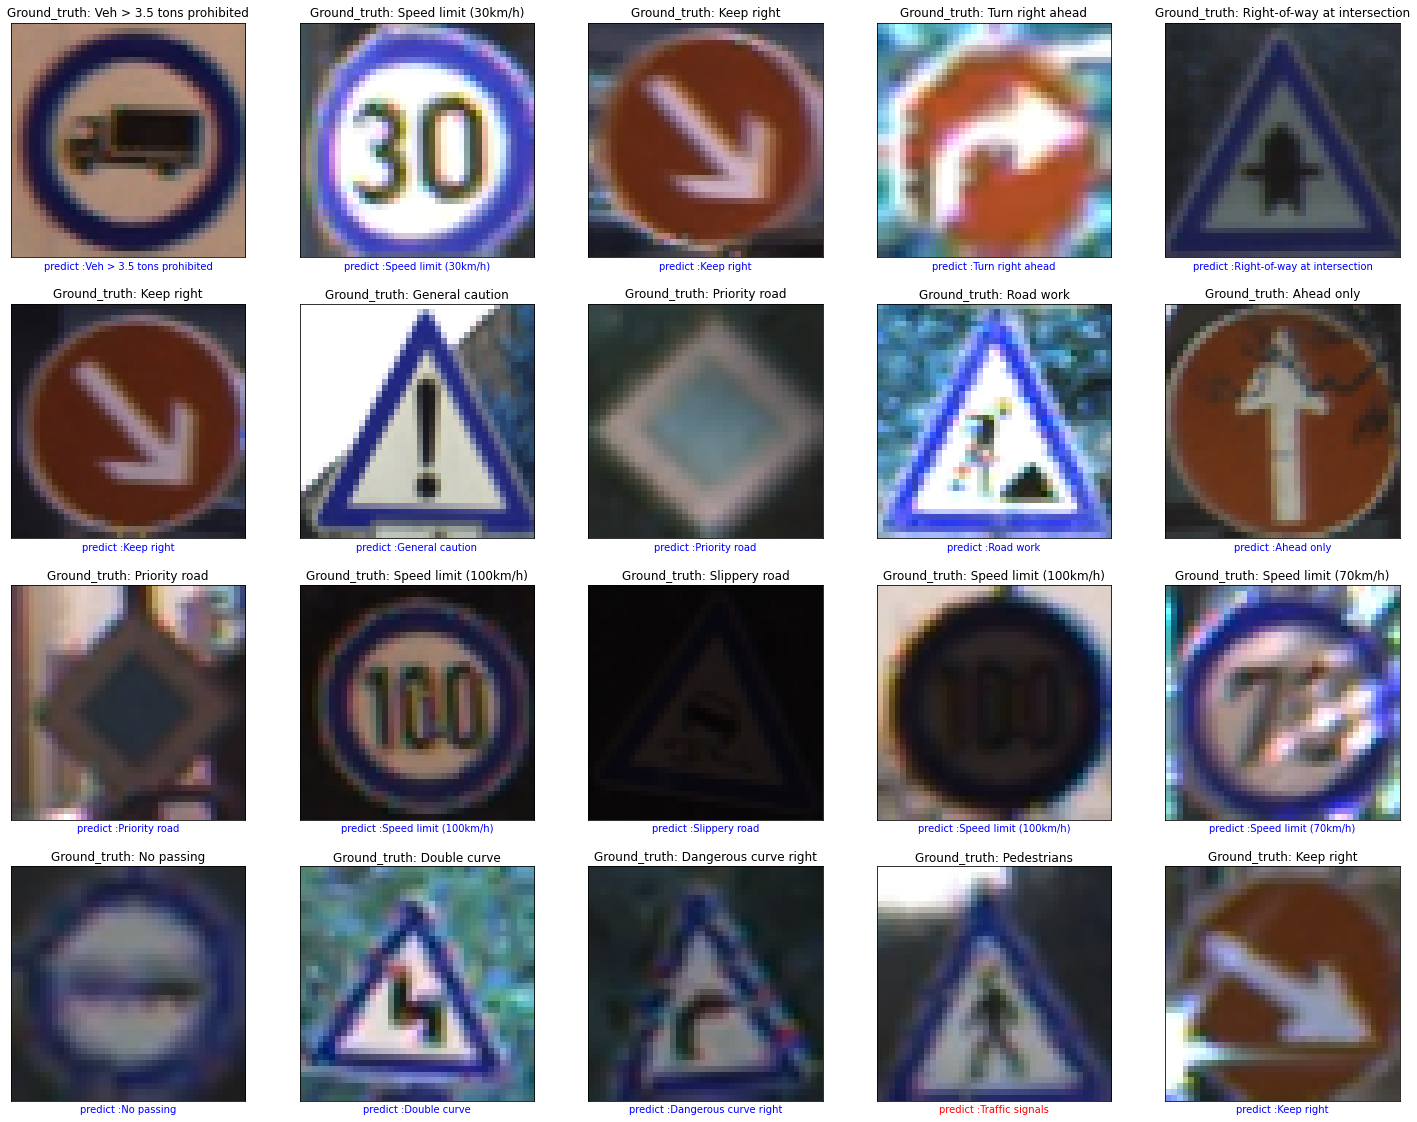

In [ ]:
plt.figure(figsize = (25, 25))
start_index = 0
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = rbf_prediction[start_index + i]
    actual = test_label[start_index + i]
    col = 'b'
    if prediction != actual:
        col = 'r'
    plt.xlabel("predict :"+classes[prediction], color = col)
    plt.title("Ground_truth: " +classes[test_label[i]])
    plt.imshow(test_data_orginal[start_index + i])
plt.show()